In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB

import warnings

# Ignore specific FutureWarning related to seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load the dataset
data = pd.read_csv("amazon_prime_users.csv")



In [3]:
# Display the first 5 rows of the data set
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [5]:
# Convert columns to datetime
date_columns = ['Date of Birth', 'Membership Start Date', 'Membership End Date']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [6]:
# Check to see if any email addresses are duplicated
duplicate_email_rows = data[data.duplicated(subset=['Email Address'], keep=False)]

duplicate_email_rows

# Because this is a sample dataset and the Names are different for each duplicated email address or username, I'll ignore this and leave them all in.

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
6,7,Benjamin Marshall,michaellewis@example.net,michaellewis,2003-02-09,Male,Carlsonchester,2024-04-08,2025-04-08,Monthly,Amex,Auto-renew,Frequent,Clothing,Sci-Fi,Tablet,Medium,4.4,10
33,34,Whitney Underwood,ujones@example.com,ujones,2002-07-23,Female,New Jenniferport,2024-03-30,2025-03-30,Annual,Mastercard,Auto-renew,Regular,Electronics,Horror,Smartphone,Low,4.5,10
84,85,Keith Baker,ujones@example.com,ujones,1972-07-11,Female,Langton,2024-02-03,2025-02-02,Annual,Amex,Manual,Occasional,Clothing,Horror,Smartphone,Medium,3.0,1
107,108,Grant Jensen,tyler29@example.com,tyler29,1944-07-10,Female,East Mark,2024-04-11,2025-04-11,Monthly,Amex,Manual,Regular,Clothing,Action,Tablet,Medium,3.2,7
120,121,Lisa Washington,dbailey@example.net,dbailey,1991-11-03,Male,East Charlotte,2024-03-02,2025-03-02,Annual,Visa,Manual,Frequent,Books,Drama,Smartphone,High,4.2,2
129,130,Jordan Jackson,ubrown@example.org,ubrown,1953-09-28,Female,Lake Amystad,2024-01-05,2025-01-04,Annual,Mastercard,Manual,Occasional,Electronics,Sci-Fi,Tablet,Medium,4.4,3
147,148,Troy Smith,john96@example.net,john96,1980-06-26,Male,West Jennifer,2024-03-27,2025-03-27,Monthly,Visa,Manual,Regular,Books,Horror,Smart TV,Low,4.3,0
175,176,Alexandra James,twilliams@example.com,twilliams,1986-07-07,Female,Lake Codymouth,2024-02-13,2025-02-12,Monthly,Mastercard,Auto-renew,Frequent,Books,Horror,Smart TV,High,3.3,8
401,402,Olivia Harper,twilliams@example.com,twilliams,2004-06-22,Female,Port Charles,2024-02-27,2025-02-26,Annual,Amex,Auto-renew,Frequent,Electronics,Documentary,Smartphone,High,4.0,6
443,444,Brent Key,sburke@example.com,sburke,1957-04-24,Male,Gonzalezland,2024-01-08,2025-01-07,Annual,Amex,Manual,Frequent,Books,Romance,Smart TV,Medium,3.5,5


In [7]:
# Remove columns that I won't need
data = data.drop(columns = ['User ID', 'Name', 'Email Address', 'Username'])


In [8]:
# Create an age column based on years since the date of birth
current_date = datetime.now()
current_year = current_date.year
data['Age'] = current_year - data['Date of Birth'].dt.year
data.head()


,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age
0,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,71
1,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,46
2,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,30
3,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,60
4,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,63


In [9]:
# Check month distribution for memberships started
data['Month'] = data['Membership Start Date'].dt.month
data['Month_Text'] = data['Membership Start Date'].dt.month_name().str.slice(stop=3)

# Group by `Month` and `Month_Text`, sum it, and sort. Assign result to new DataFrame
data_by_month = data.groupby(['Month', 'Month_Text']).size().reset_index(name='Count').sort_values('Month').head(12)
data_by_month

# April is lower than the rest as the data only goes through 4-13-2024

,Month,Month_Text,Count
0,1,Jan,773
1,2,Feb,651
2,3,Mar,744
3,4,Apr,332


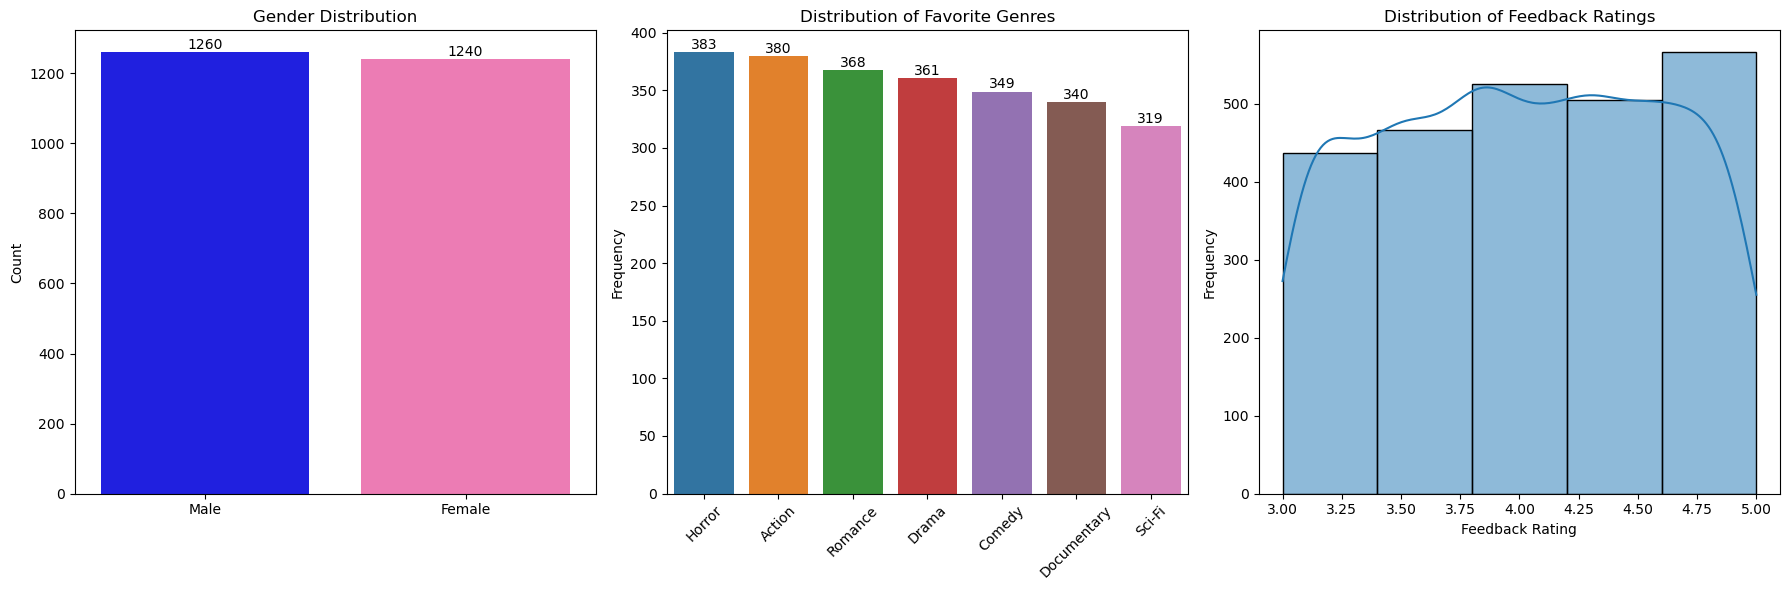

In [10]:
pd.set_option('mode.use_inf_as_na', True)
# Create subplots for three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar plot of Gender Distribution
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0], palette=['blue', 'hotpink'])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Add counts above the bars
for index, value in enumerate(gender_counts.values):
    axes[0].text(index, value + 0.1, str(value), ha='center', va='bottom')

# Plot 2: Bar plot of Favorite Genres
genre_counts = data['Favorite Genres'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Favorite Genres')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add counts above the bars
for index, value in enumerate(genre_counts.values):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom')
    
# Plot 3: Histogram of Feedback Ratings
sns.histplot(data=data, x='Feedback/Ratings', bins=5, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Feedback Ratings')
axes[2].set_xlabel('Feedback Rating')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

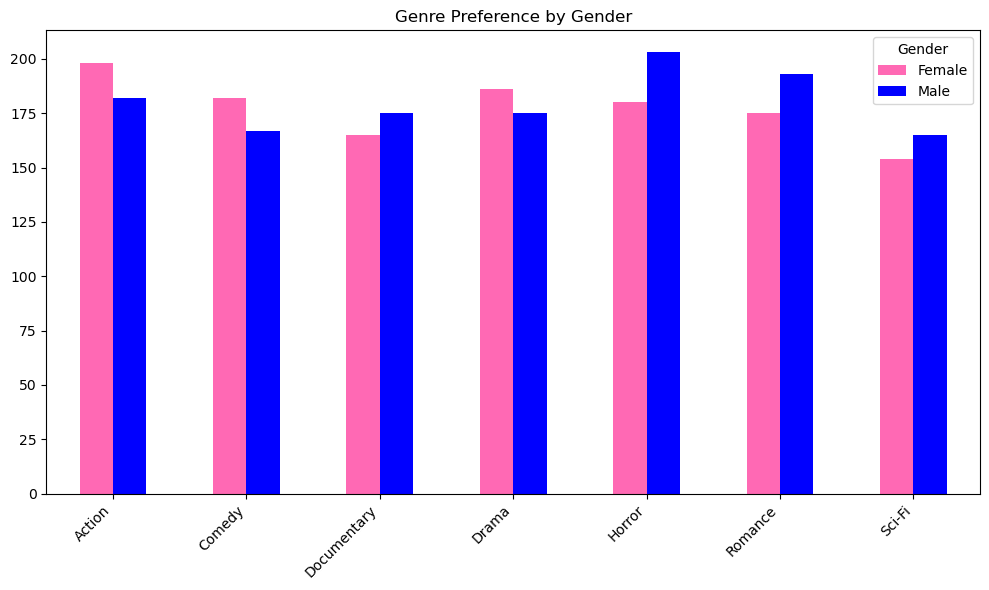

In [11]:
# Group data by gender and favorite genres, and calculate counts
genre_summary = data.groupby(['Gender', 'Favorite Genres']).size().reset_index(name='Count')
#print(genre_summary)


# Pivot the DataFrame to have favorite genres as columns
genre_summary_pivot = genre_summary.pivot(index='Favorite Genres', columns='Gender', values='Count').fillna(0)

# Plot
genre_summary_pivot.plot(kind='bar', figsize=(10, 6), color=['hotpink', 'blue'])
plt.title('Genre Preference by Gender')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [12]:
# Check the options and amounts of usage frequency
data['Usage Frequency'].value_counts()

Usage Frequency
Frequent      851
Regular       827
Occasional    822
Name: count, dtype: int64

In [13]:
# Create a copy of the dataset to manipulate for the model
data_model = data.copy()


# Drop more features for easier reading and usage, now that the initial EDA is complete
data_model = data_model.drop(columns = ['Gender', 
                                        'Location', 
                                        'Membership Start Date', 
                                        'Membership End Date',
                                        'Date of Birth',
                                        'Month_Text',
                                        'Month',
                                        'Feedback/Ratings',
                                        'Payment Information',
                                        'Age'])

In [14]:
# Define a mapping dictionary for usage freq.
usage_frequency_mapping = {
    'Occasional': 1,
    'Regular': 2,
    'Frequent': 3
}

# Define a mapping dictionary for engagement metrics
engagement_metrics_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}



# Apply the mapping to the "Usage Frequency" and "Engagement Metrics"
data_model['Usage Frequency'] = data_model['Usage Frequency'].map(usage_frequency_mapping)

data_model['Engagement Metrics'] = data_model['Engagement Metrics'].map(engagement_metrics_mapping)

In [15]:
# Define the columns to convert to dummy variables
columns_to_convert = ['Renewal Status', 
                      'Devices Used',
                      'Purchase History',
                      'Favorite Genres',
                      'Customer Support Interactions']
                      
# Create dummy variables for the specified columns
dummy_variables = pd.get_dummies(data_model[columns_to_convert], drop_first=True, prefix='', prefix_sep='', dtype=int)

# Concatenate the dummy variables with the original dataset
data_model = pd.concat([data_model, dummy_variables], axis=1)

# Drop the original categorical columns
data_model.drop(columns=columns_to_convert, inplace=True)


In [16]:
# Check back on the data set
data_model.head()


,Subscription Plan,Usage Frequency,Engagement Metrics,Manual,Smartphone,Tablet,Clothing,Electronics,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi
0,Annual,2,2,1,0,0,0,1,0,1,0,0,0,0
1,Monthly,2,2,1,1,0,0,1,0,0,0,1,0,0
2,Monthly,2,1,1,0,0,0,0,1,0,0,0,0,0
3,Monthly,2,3,0,0,0,0,1,0,1,0,0,0,0
4,Annual,3,1,0,0,0,1,0,0,0,1,0,0,0


In [17]:
# Split the data into features (X) and target variable (y)
X = data_model.drop(columns=['Subscription Plan'])  # Features
y = data_model['Subscription Plan']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8,test_size=0.2, random_state=42)



# Define a list of models
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

# Iterate over each model
for model in models:
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Annual')
    recall = recall_score(y_test, y_pred, pos_label='Annual')
    f1 = f1_score(y_test, y_pred, pos_label = "Annual")
    
    # Print the model's performance
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}, F1: {f1:.5f}")

Model: LogisticRegression, Accuracy: 0.52400, Precision: 0.51662, Recall: 0.68675, F1: 0.58966
Model: DecisionTreeClassifier, Accuracy: 0.51800, Precision: 0.51418, Recall: 0.58233, F1: 0.54614
Model: RandomForestClassifier, Accuracy: 0.53800, Precision: 0.53689, Recall: 0.52610, F1: 0.53144


In [18]:
# Retest the data to determine if a different split improves accuracy

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=0.3, random_state=42)

models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

# Iterate over each model
for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Annual')
    recall = recall_score(y_test, y_pred, pos_label='Annual')
    f1 = f1_score(y_test, y_pred, pos_label = "Annual")
    
    # Print the model's performance
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}, F1: {f1:.5f}")

Model: LogisticRegression, Accuracy: 0.49067, Precision: 0.51270, Recall: 0.56489, F1: 0.53753
Model: DecisionTreeClassifier, Accuracy: 0.54667, Precision: 0.56265, Recall: 0.60560, F1: 0.58333
Model: RandomForestClassifier, Accuracy: 0.52800, Precision: 0.55256, Recall: 0.52163, F1: 0.53665


In [19]:
# The Decision tree has the highest accuracy, precision, and recall. Outperforming the other models and performing better in the 70-30 split compared to the 80-20 split, most likely due to more data learn more effective.

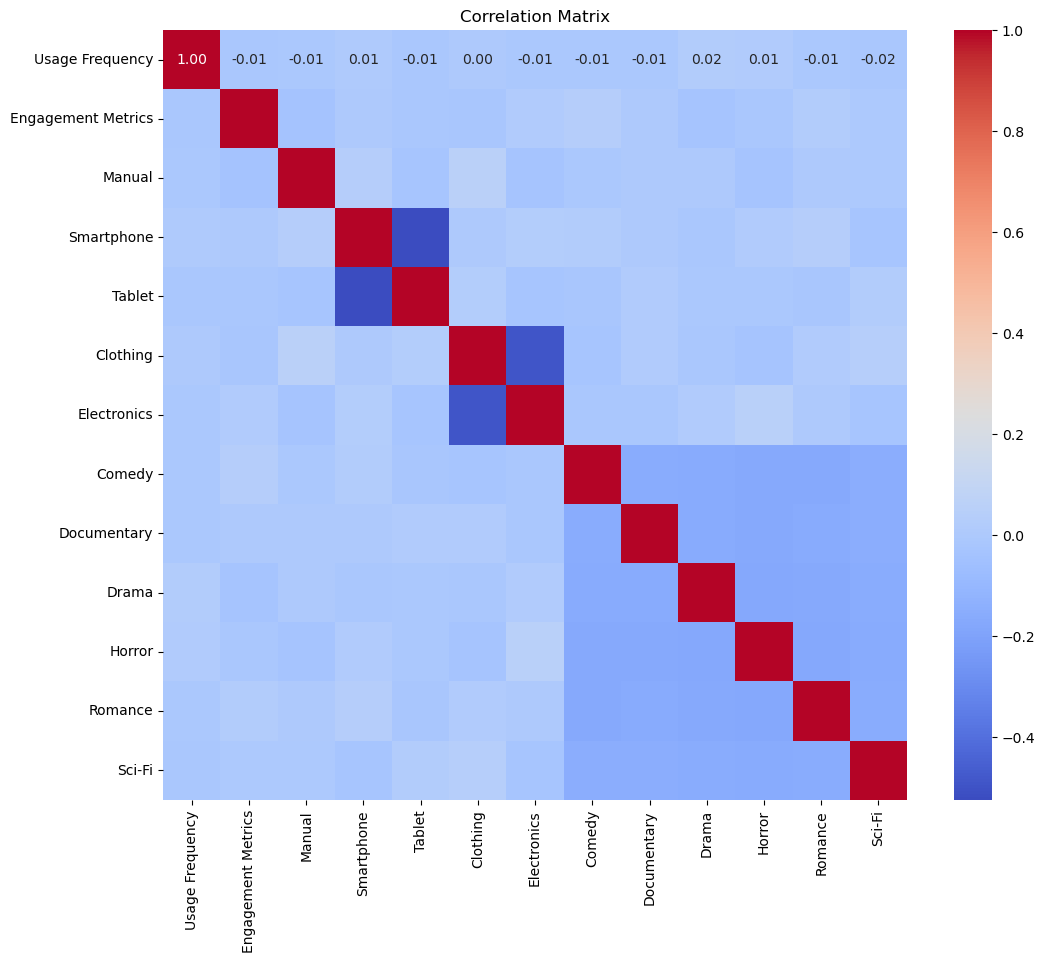

In [20]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

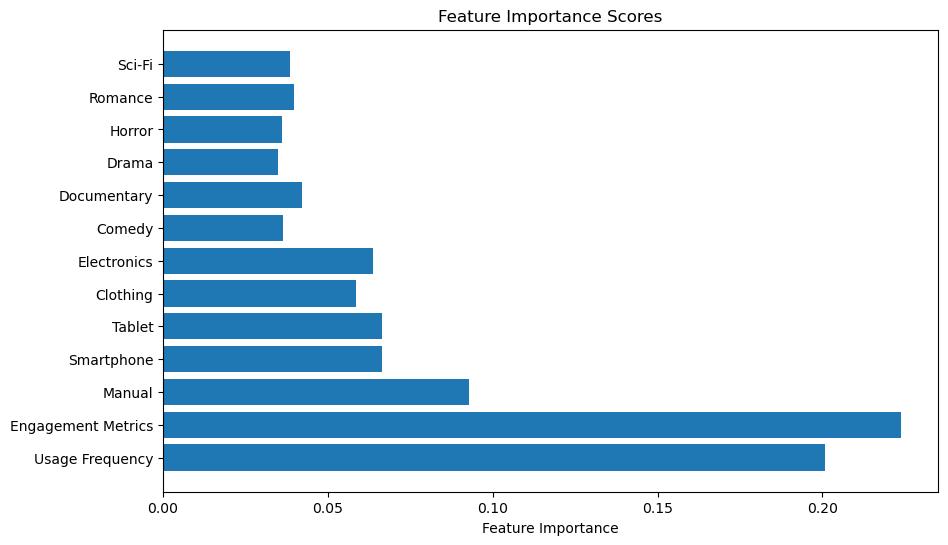

In [21]:
# Get feature importances for random forest model
feature_importances = models[2].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()


In [22]:
# Testing new hyperparameters utilizing GridSearch to see if a better random forest can be created

In [23]:
# Separate into labels and features
y = data_model['Subscription Plan']
X = data_model.drop('Subscription Plan', axis=1)

# train, val, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# Set hyperparamaters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# Split index
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# search over parameters
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [24]:
#obtain optimal paramaters
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [25]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 42)

In [26]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=42)

In [59]:
# Predict on test set
y_pred = rf_opt.predict(X_test)

# Get scores
pc_test = precision_score(y_test, y_pred, pos_label = "Annual")
rc_test = recall_score(y_test, y_pred, pos_label = "Annual")
ac_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, pos_label = "Annual")

# Print results
table = pd.DataFrame({'Model': ["Decision Tree","Tuned Random Forest"],
                        'F1':  [0.58333, f1_test],
                        'Recall': [0.60560, rc_test],
                        'Precision': [0.56265,pc_test],
                        'Accuracy': [0.54667, ac_test]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.583330,0.605600,0.562650,0.54667
1,Tuned Random Forest,0.547655,0.555215,0.540299,0.52160


In [28]:
# We can see that the Decision Tree with 75/25 split has better scores all around